
# **ANALISIS PRINCIPAL**


In [ ]:
!pip install -U ydata-profiling
from ydata_profiling import ProfileReport
df1 = ProfileReport(df, title="Reporte")

In [ ]:
df1.to_notebook_iframe()
df1.to_file("df_profilling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

#**OD_mg/L**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [ ]:
df = pd.read_parquet('/content/water_quality_tidy_data.parquet')

Antes de aplicar cualquier método, realizaremos un análisis visual (boxplots) para identificar claramente los outliers y veremos si tenemos valores faltantes.

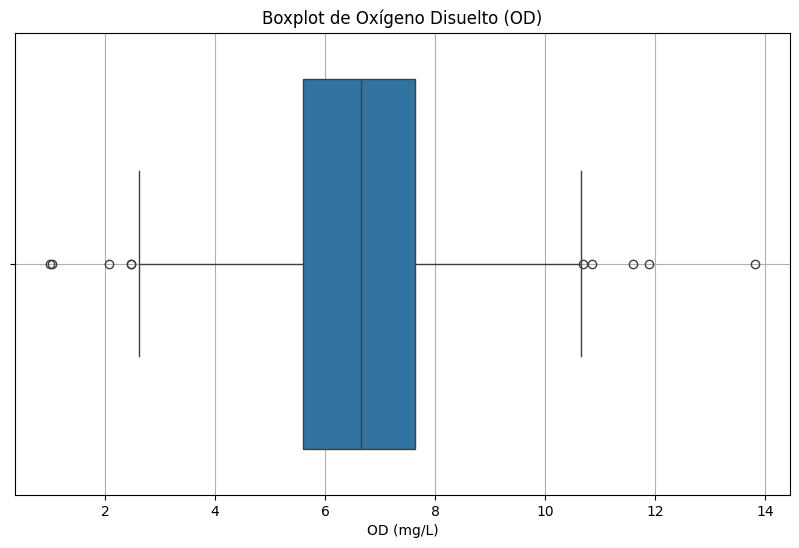

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['OD_mg/L'])
plt.title('Boxplot de Oxígeno Disuelto (OD)')
plt.xlabel('OD (mg/L)')
plt.grid()
plt.show()

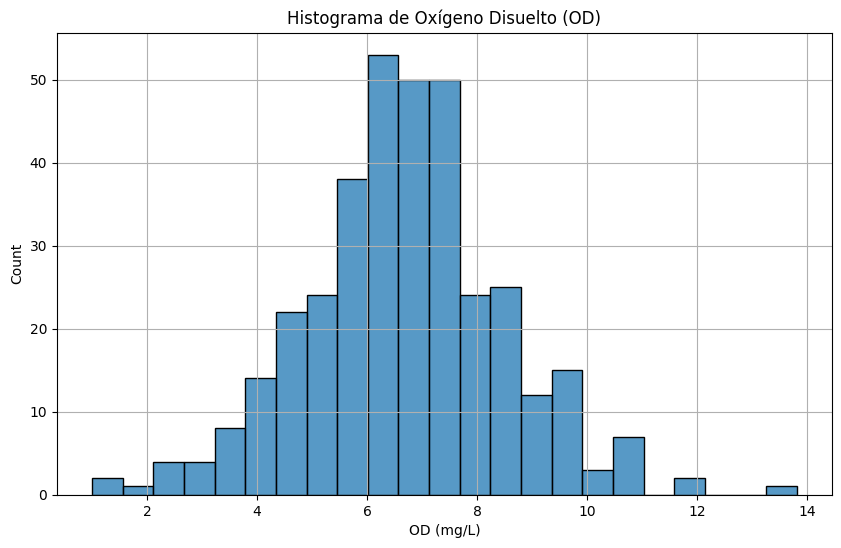

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df['OD_mg/L'])
plt.title('Histograma de Oxígeno Disuelto (OD)')
plt.xlabel('OD (mg/L)')
plt.grid()
plt.show()

In [ ]:
valores_faltantes = df['OD_mg/L'].isnull().sum()
print(valores_faltantes)

114


Vamos a crear una copia del DataFrame original (df_copy) para no modificar los datos originales y poder comparar los resultados antes y después de la imputación.

Porque imputar? Al imputar los valores faltantes en la columna 'OD_mg/L', se evita eliminar las observaciones que contienen datos faltantes, lo que permite mantener un tamaño de muestra más grande y obtener resultados más robustos.

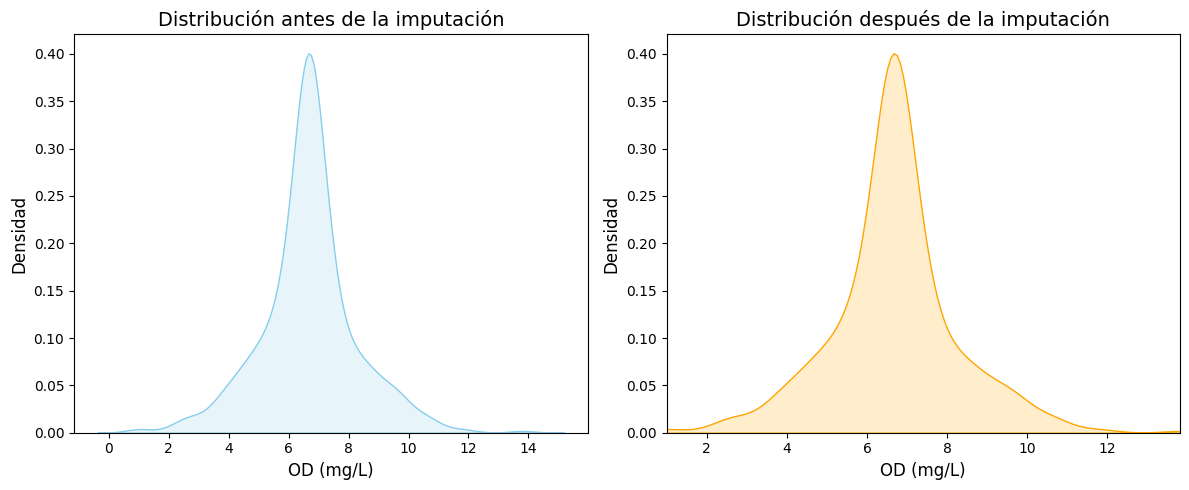

In [ ]:
# Crear una copia del DataFrame para no modificar los datos originales
df_copy = df.copy()

# Extraer la columna con los valores faltantes y convertirla en un array 2D
column_with_missing_values = 'OD_mg/L'
data_to_impute = df_copy[column_with_missing_values].values.reshape(-1, 1)

# Imputar los valores faltantes usando KNN (ajusta el número de vecinos si es necesario)
imputer = KNNImputer(n_neighbors=30)  # Puedes experimentar con diferentes valores
imputed_data = imputer.fit_transform(data_to_impute)

# Reemplazar los valores faltantes en la copia del DataFrame
df_copy[column_with_missing_values] = imputed_data.squeeze()

# Actualizar el DataFrame original con los datos imputados
df.update(df_copy)

# Visualizar los datos después de la imputación
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Personalizar el estilo del gráfico
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Histograma antes de la imputación (datos originales)
sns.kdeplot(data=df, x=column_with_missing_values, ax=axes[0], fill=True, alpha=0.2, color='skyblue')
axes[0].set_title('Distribución antes de la imputación', fontsize=14)
axes[0].set_xlabel('OD (mg/L)', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)
axes[0].tick_params(labelsize=10)

# Histograma después de la imputación (datos imputados)
sns.kdeplot(data=df_copy, x=column_with_missing_values, ax=axes[1], fill=True, alpha=0.2, color='orange')
axes[1].set_title('Distribución después de la imputación', fontsize=14)
axes[1].set_xlabel('OD (mg/L)', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)
axes[1].tick_params(labelsize=10)

# Ajustar los límites de los ejes para una mejor comparación
plt.xlim(df[column_with_missing_values].min(), df[column_with_missing_values].max())
plt.tight_layout()
plt.show()

Número de outliers encontrados con Z-score: 5


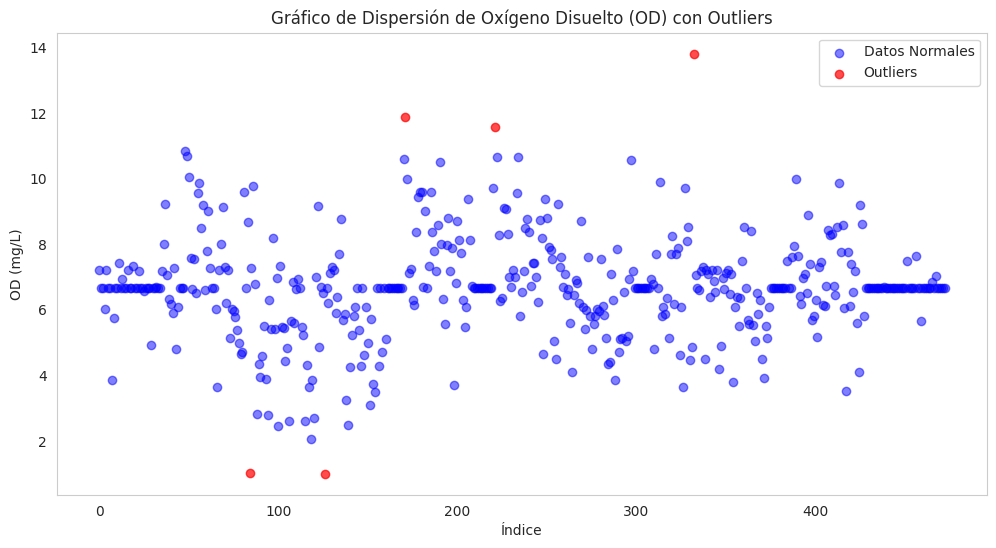

In [ ]:

# Calcular el Z-score
z_scores = stats.zscore(df_copy['OD_mg/L'].dropna())

# Crear una columna para identificar outliers
df_copy['outlier'] = np.where((z_scores > 3) | (z_scores < -3), True, False)

# Contar el número de outliers
num_outliers_z = df_copy['outlier'].sum()  # Sumar los valores True en la columna 'outlier'
print(f"Número de outliers encontrados con Z-score: {num_outliers_z}")

# Graficar
plt.figure(figsize=(12, 6))

# Graficar los datos normales
plt.scatter(df_copy.index[df_copy['outlier'] == False],
            df_copy['OD_mg/L'][df_copy['outlier'] == False],
            color='blue', label='Datos Normales', alpha=0.5)

# Graficar los outliers
plt.scatter(df_copy.index[df_copy['outlier'] == True],
            df_copy['OD_mg/L'][df_copy['outlier'] == True],
            color='red', label='Outliers', alpha=0.7)

plt.title('Gráfico de Dispersión de Oxígeno Disuelto (OD) con Outliers')
plt.xlabel('Índice')
plt.ylabel('OD (mg/L)')
plt.legend()
plt.grid()
plt.show()


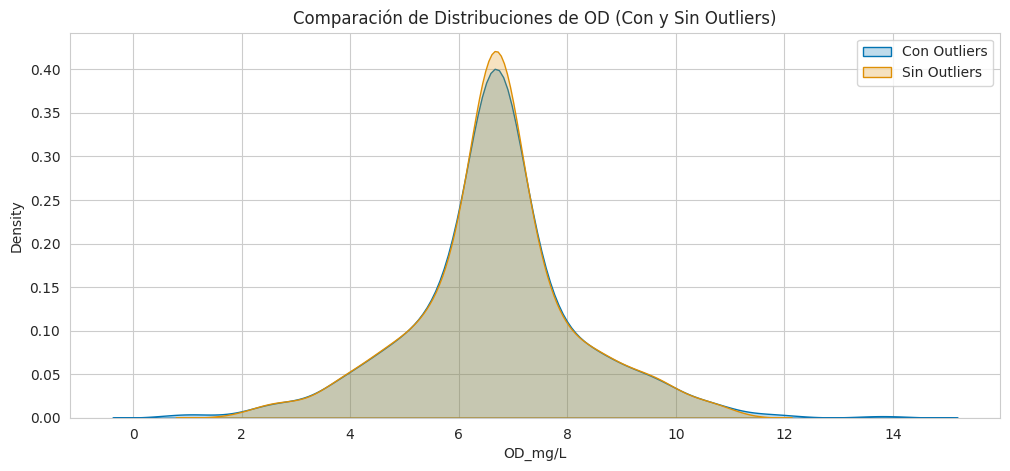

In [ ]:
df_cleaned = df_copy[df_copy['outlier'] == False]

plt.figure(figsize=(12, 5))
sns.kdeplot(df_copy['OD_mg/L'], label='Con Outliers', fill=True)
sns.kdeplot(df_cleaned['OD_mg/L'], label='Sin Outliers', fill=True)
plt.title('Comparación de Distribuciones de OD (Con y Sin Outliers)')
plt.legend()
plt.show()

In [ ]:
# Filtrar los outliers
outliers_info = df_copy[df_copy['outlier'] == True]

# Mostrar información sobre los outliers
print("Outliers encontrados:")
print(outliers_info.head())

Outliers encontrados:
    CLAVE SITIO  ESTADO  MUNICIPIO       CUERPO DE AGUA TIPO CUERPO DE AGUA  \
84    OCNOR3989  SONORA    CANANEA  ARROYO EL BARRILITO    LÓTICO (HUMEDAL)   
126   OCNOR3990  SONORA    ACONCHI           RIO SONORA              LÓTICO   
171   OCNOR4017  SONORA       URES           RIO SONORA              LÓTICO   
221   OCNOR4019  SONORA  BAVIÁCORA           RIO SONORA              LÓTICO   
332   OCNOR4022  SONORA    ACONCHI           RIO SONORA    LÓTICO (HUMEDAL)   

    SUBTIPO CUERPO AGUA   LATITUD   LONGITUD FECHA REALIZACIÓN  OD_mg/L  \
84               ARROYO  30.99713 -110.28877        2012-11-15     1.03   
126                 RÍO  29.84478 -110.27754        2012-11-10     1.00   
171                 RÍO  29.32107 -110.54156        2013-01-10    11.89   
221                 RÍO  29.53502 -110.12087        2013-01-14    11.59   
332                 RÍO  29.82440 -110.23701        2020-10-27    13.81   

     DBO_TOT   DQO_TOT  COLI_FEC   E_COLI   N_TOT   

¿QUE HAREMOS CON LOS OUTLIERS?

#**DBO_TOT PRUEBAS**

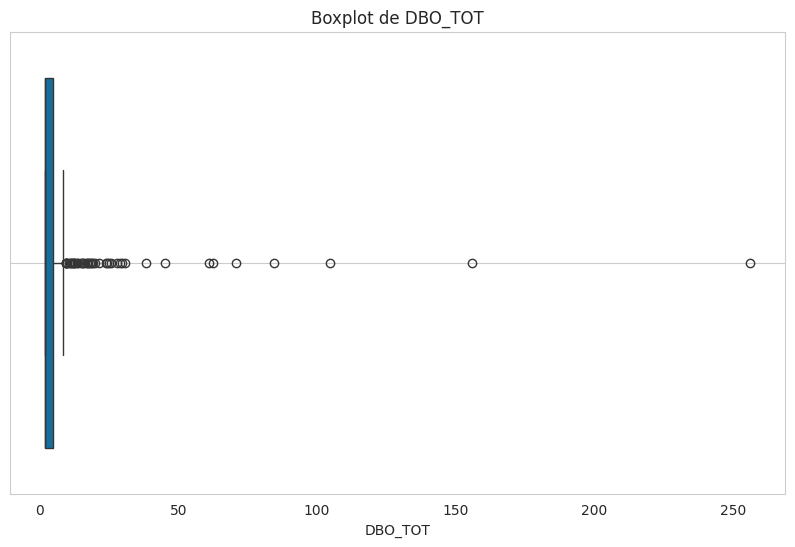

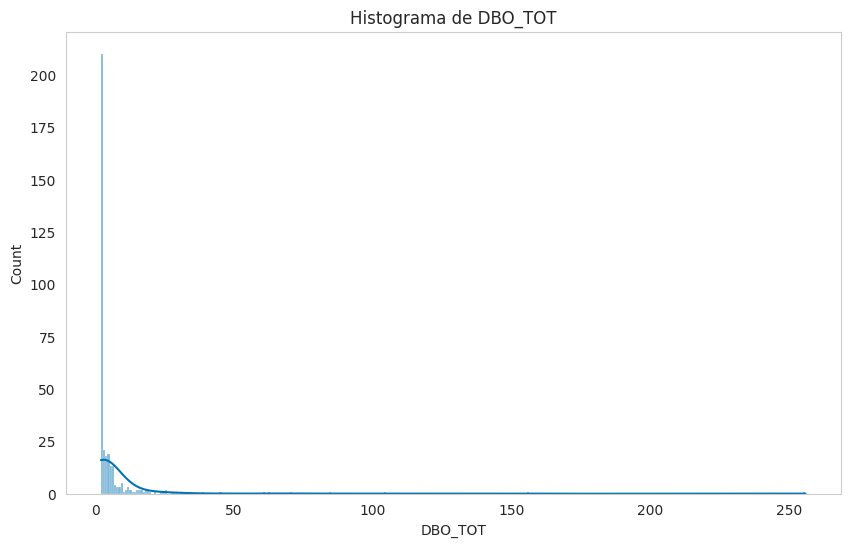

Valores faltantes en DBO_TOT: 124


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar DBO_TOT
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DBO_TOT'])
plt.title('Boxplot de DBO_TOT')
plt.xlabel('DBO_TOT')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['DBO_TOT'], kde=True)
plt.title('Histograma de DBO_TOT')
plt.xlabel('DBO_TOT')
plt.grid()
plt.show()

# Verificar valores faltantes
missing_values = df['DBO_TOT'].isnull().sum()
print(f'Valores faltantes en DBO_TOT: {missing_values}')


In [ ]:
df_ffill = df.copy()
df_ffill['DBO_TOT_ffill'] = df_ffill['DBO_TOT'].fillna(method='ffill')


<ipython-input-34-cf9e8b60ab63>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill['DBO_TOT_ffill'] = df_ffill['DBO_TOT'].fillna(method='ffill')


In [ ]:
df_bfill = df.copy()
df_bfill['DBO_TOT_bfill'] = df_bfill['DBO_TOT'].fillna(method='bfill')


<ipython-input-35-73e422e66397>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill['DBO_TOT_bfill'] = df_bfill['DBO_TOT'].fillna(method='bfill')


In [ ]:
df_interpolate = df.copy()
df_interpolate['DBO_TOT_interpolate'] = df_interpolate['DBO_TOT'].interpolate(method='linear')


In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn['DBO_TOT_knn'] = knn_imputer.fit_transform(df_knn[['DBO_TOT']])


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer(random_state=42)
df_mice = df.copy()
df_mice['DBO_TOT_mice'] = mice_imputer.fit_transform(df_mice[['DBO_TOT']])


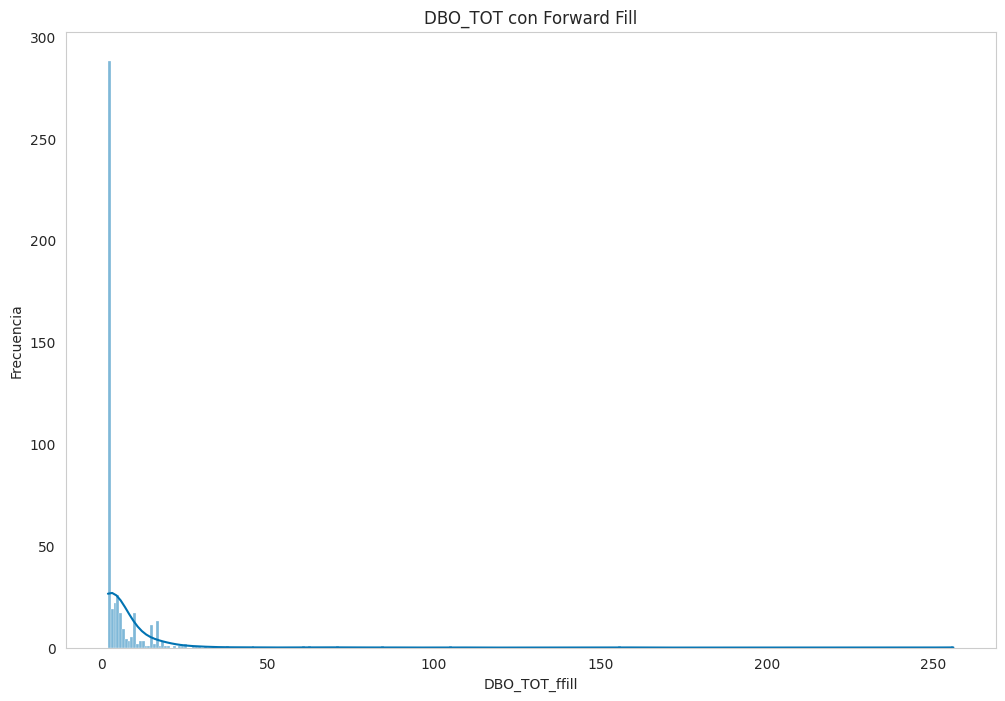

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df_ffill['DBO_TOT_ffill'], kde=True)
plt.title('DBO_TOT con Forward Fill')
plt.xlabel('DBO_TOT_ffill')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


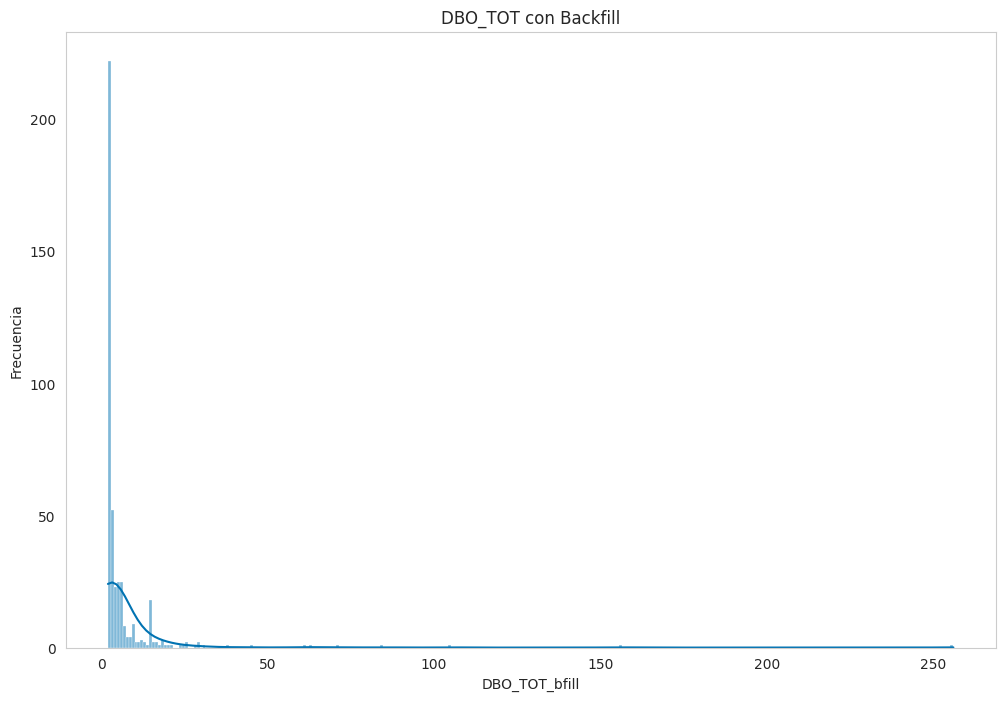

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df_bfill['DBO_TOT_bfill'], kde=True)
plt.title('DBO_TOT con Backfill')
plt.xlabel('DBO_TOT_bfill')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


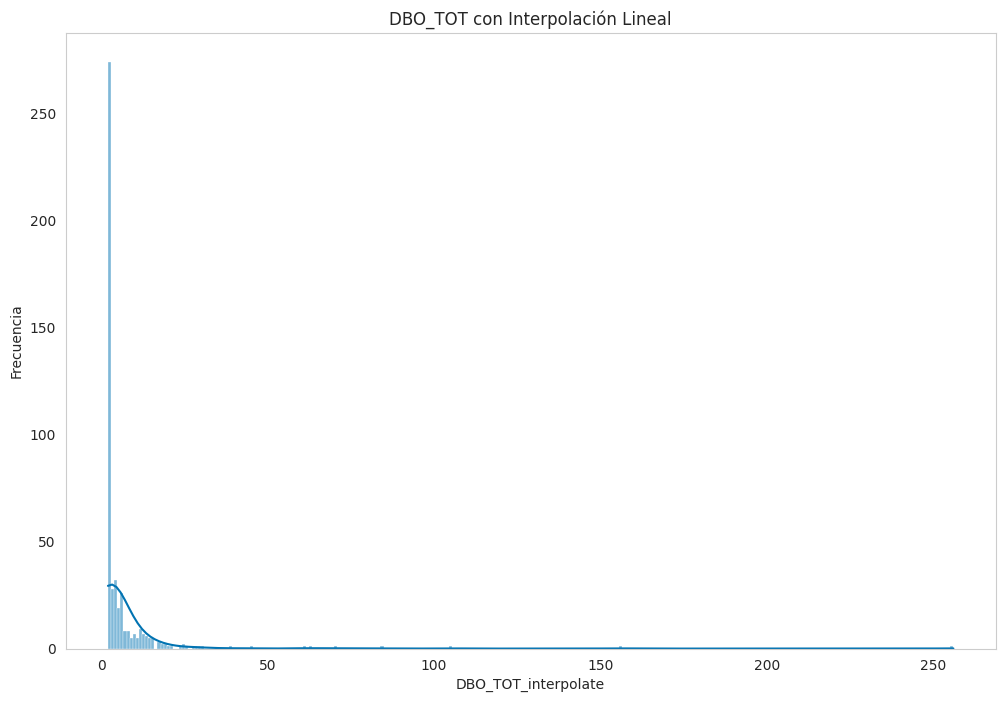

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df_interpolate['DBO_TOT_interpolate'], kde=True)
plt.title('DBO_TOT con Interpolación Lineal')
plt.xlabel('DBO_TOT_interpolate')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


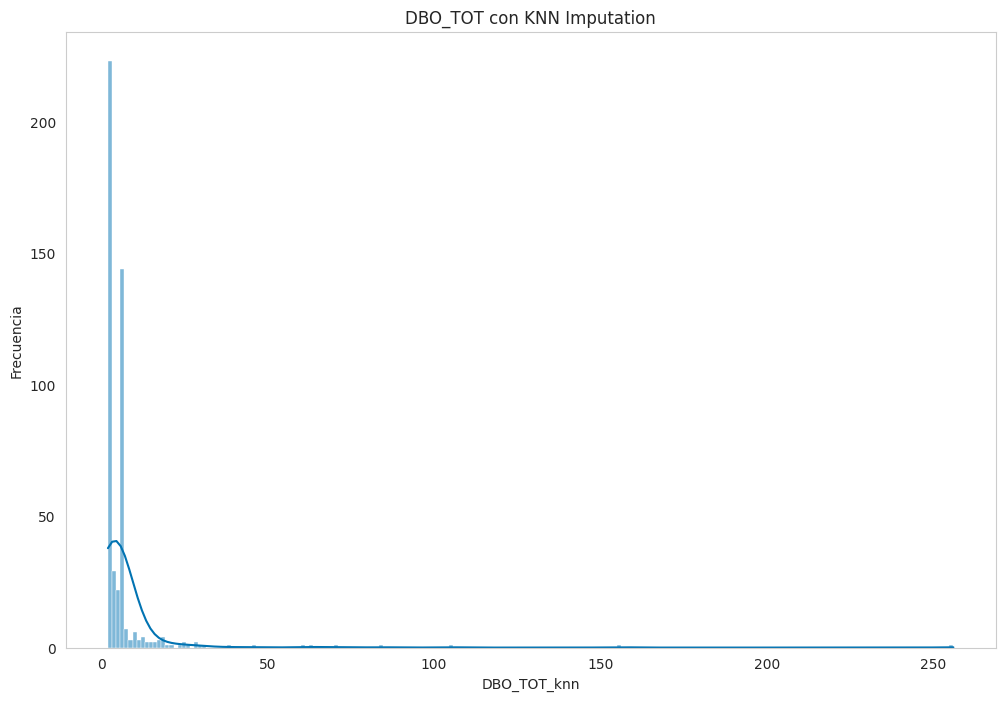

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df_knn['DBO_TOT_knn'], kde=True)
plt.title('DBO_TOT con KNN Imputation')
plt.xlabel('DBO_TOT_knn')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


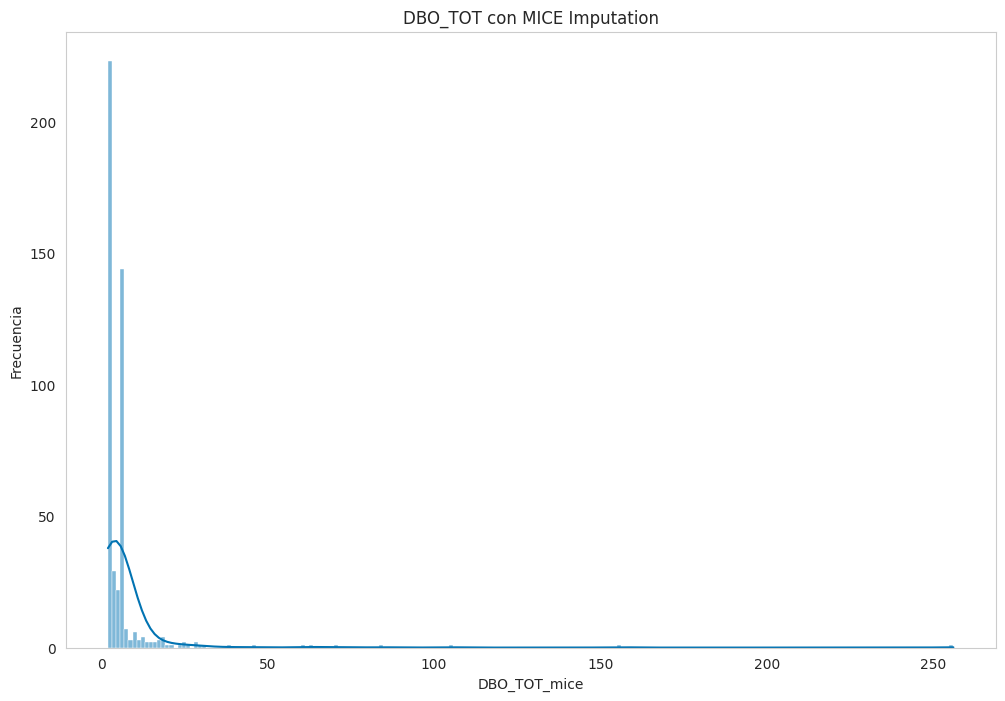

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df_mice['DBO_TOT_mice'], kde=True)
plt.title('DBO_TOT con MICE Imputation')
plt.xlabel('DBO_TOT_mice')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detectar outliers en los diferentes conjuntos
df_ffill['outlier_ffill'] = detect_outliers_iqr(df_ffill['DBO_TOT_ffill'])
df_bfill['outlier_bfill'] = detect_outliers_iqr(df_bfill['DBO_TOT_bfill'])
df_interpolate['outlier_interpolate'] = detect_outliers_iqr(df_interpolate['DBO_TOT_interpolate'])
df_knn['outlier_knn'] = detect_outliers_iqr(df_knn['DBO_TOT_knn'])
df_mice['outlier_mice'] = detect_outliers_iqr(df_mice['DBO_TOT_mice'])

# Mostrar el conteo de outliers
print(f'Outliers (FFill): {df_ffill["outlier_ffill"].sum()}')
print(f'Outliers (BFill): {df_bfill["outlier_bfill"].sum()}')
print(f'Outliers (Interpolate): {df_interpolate["outlier_interpolate"].sum()}')
print(f'Outliers (KNN): {df_knn["outlier_knn"].sum()}')
print(f'Outliers (MICE): {df_mice["outlier_mice"].sum()}')


Outliers (FFill): 60
Outliers (BFill): 56
Outliers (Interpolate): 58
Outliers (KNN): 30
Outliers (MICE): 30


In [ ]:
def plot_outliers(data, column, outlier_column, title):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=data.index, y=data[column], color='blue', label='Valores normales')
    sns.scatterplot(x=data[data[outlier_column]].index, y=data[data[outlier_column]][column], color='red', label='Outliers')
    plt.title(title)
    plt.xlabel('Índice')
    plt.ylabel(column)
    plt.grid()
    plt.legend()
    plt.show()


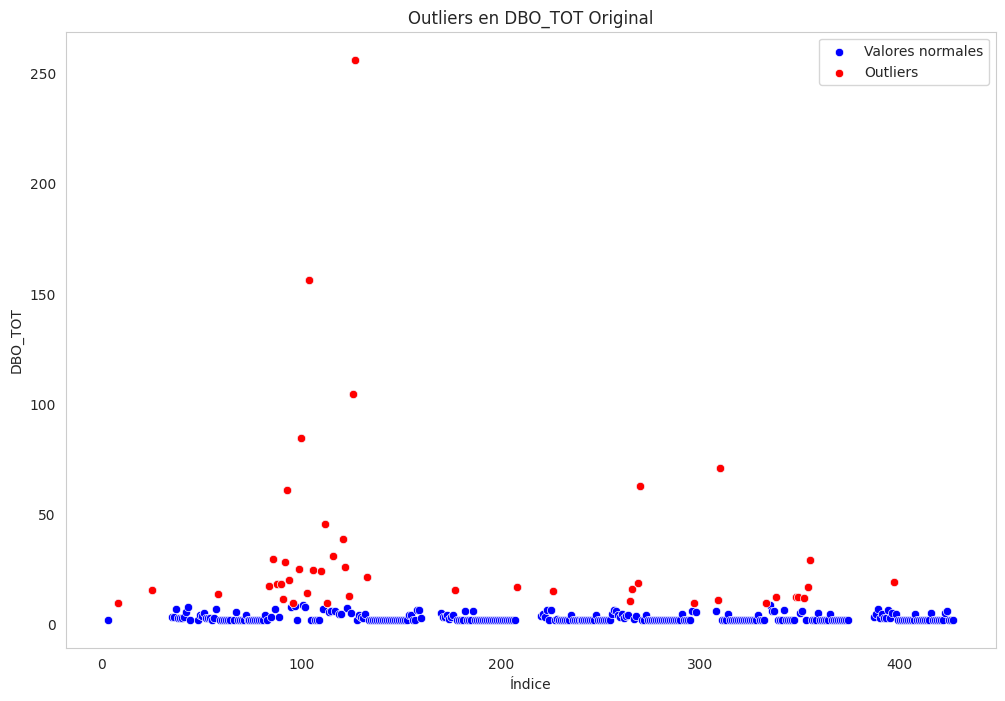

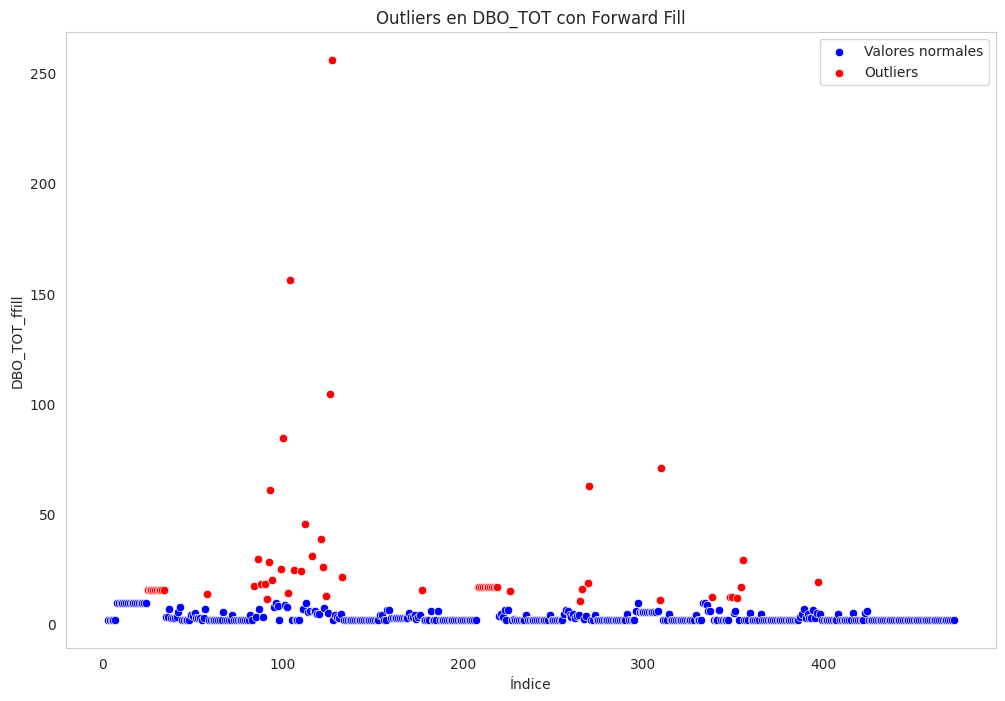

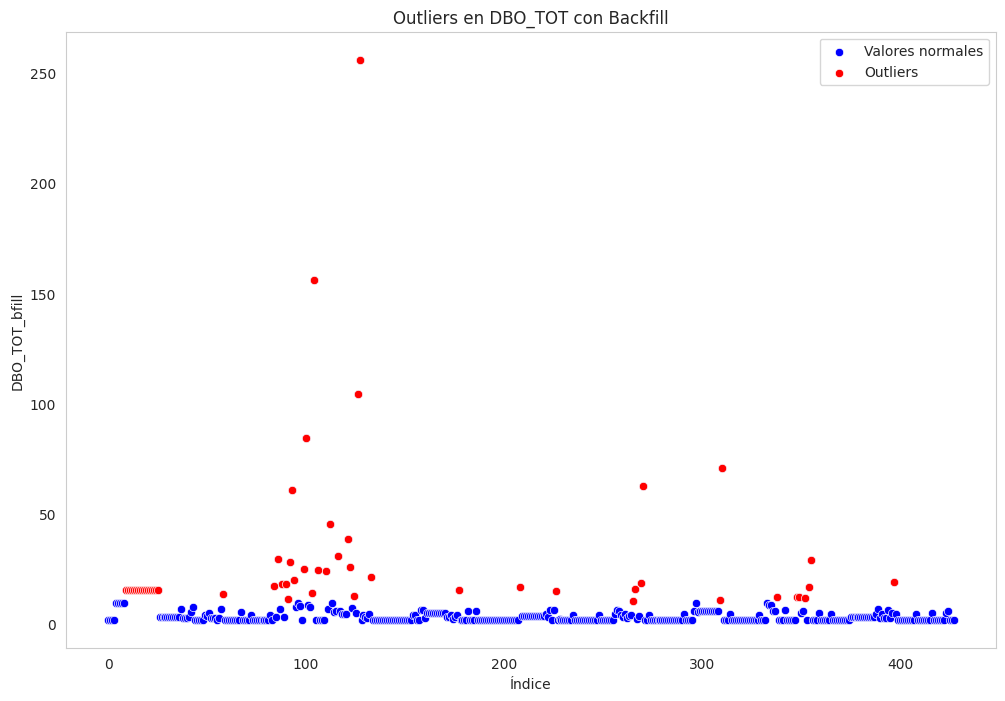

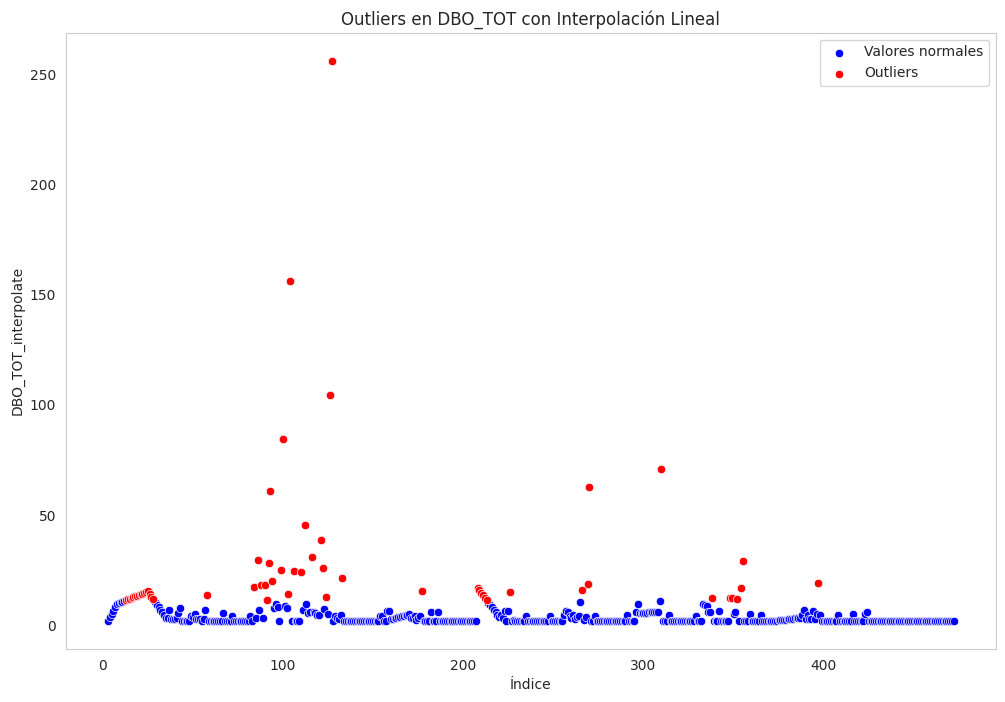

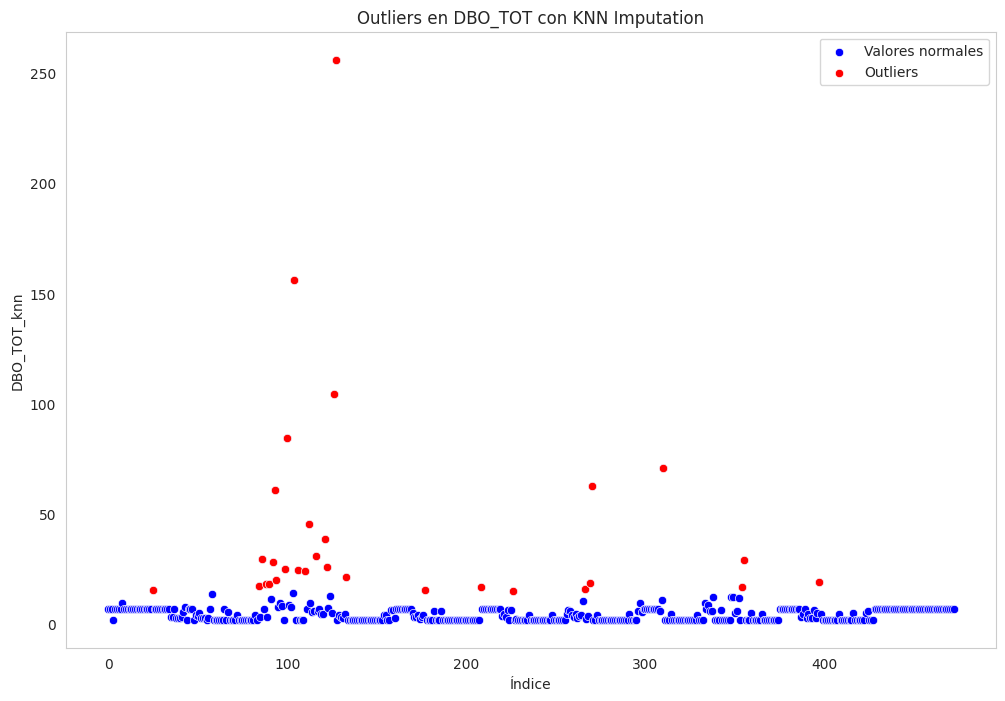

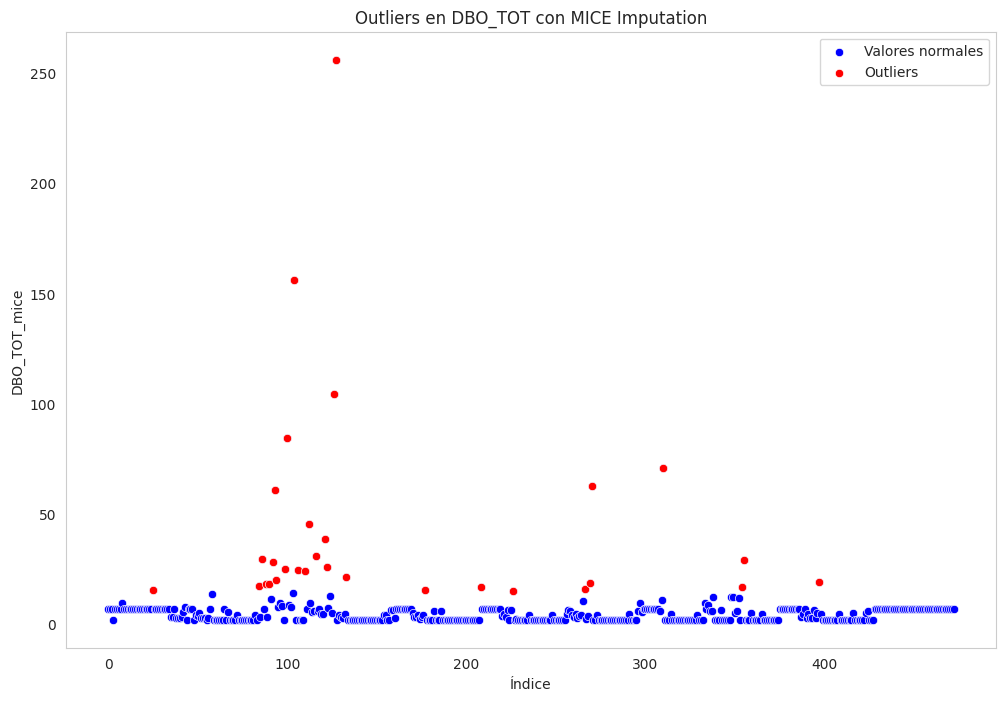

In [ ]:
# Outliers en la columna original
df['outlier_original'] = detect_outliers_iqr(df['DBO_TOT'])
plot_outliers(df, 'DBO_TOT', 'outlier_original', 'Outliers en DBO_TOT Original')

# Outliers en Forward Fill
df_ffill['outlier_ffill'] = detect_outliers_iqr(df_ffill['DBO_TOT_ffill'])
plot_outliers(df_ffill, 'DBO_TOT_ffill', 'outlier_ffill', 'Outliers en DBO_TOT con Forward Fill')

# Outliers en Backfill
df_bfill['outlier_bfill'] = detect_outliers_iqr(df_bfill['DBO_TOT_bfill'])
plot_outliers(df_bfill, 'DBO_TOT_bfill', 'outlier_bfill', 'Outliers en DBO_TOT con Backfill')

# Outliers en Interpolación Lineal
df_interpolate['outlier_interpolate'] = detect_outliers_iqr(df_interpolate['DBO_TOT_interpolate'])
plot_outliers(df_interpolate, 'DBO_TOT_interpolate', 'outlier_interpolate', 'Outliers en DBO_TOT con Interpolación Lineal')

# Outliers en KNN
df_knn['outlier_knn'] = detect_outliers_iqr(df_knn['DBO_TOT_knn'])
plot_outliers(df_knn, 'DBO_TOT_knn', 'outlier_knn', 'Outliers en DBO_TOT con KNN Imputation')

# Outliers en MICE
df_mice['outlier_mice'] = detect_outliers_iqr(df_mice['DBO_TOT_mice'])
plot_outliers(df_mice, 'DBO_TOT_mice', 'outlier_mice', 'Outliers en DBO_TOT con MICE Imputation')


#**DBO_TOT**

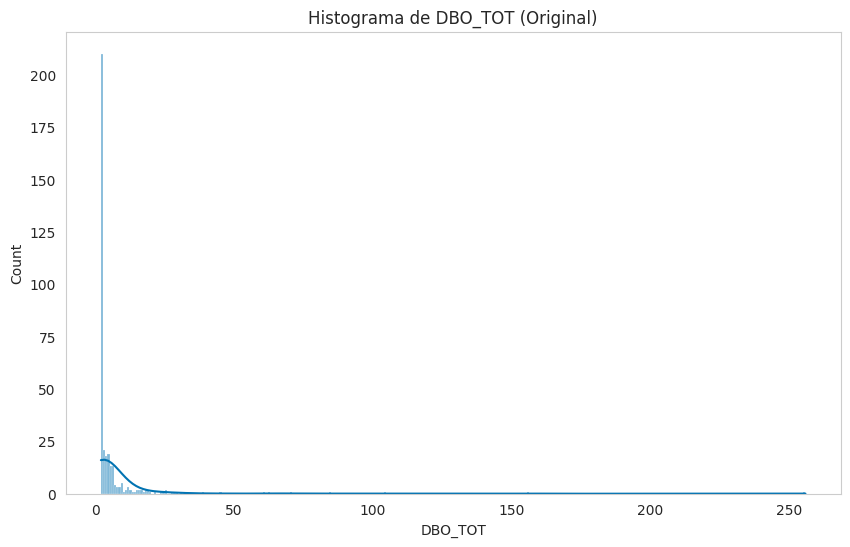

Valores faltantes en DBO_TOT: 124


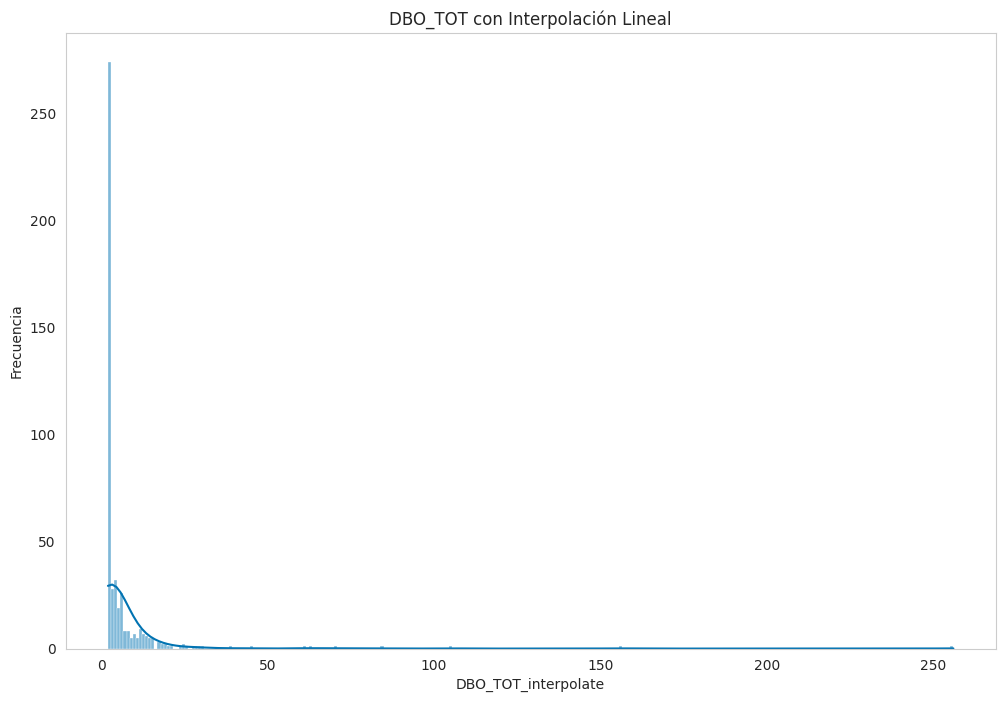

Outliers (Interpolate): 58
    CLAVE SITIO  ESTADO  MUNICIPIO       CUERPO DE AGUA TIPO CUERPO DE AGUA  \
13      MET-025  SONORA    ACONCHI  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
14      MET-025  SONORA    ACONCHI  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
15      MET-025  SONORA    ACONCHI  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
16      MET-031  SONORA       URES  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
17      MET-031  SONORA       URES  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
18      MET-031  SONORA       URES  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
19      MET-034  SONORA       URES  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
20      MET-034  SONORA       URES  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
21      MET-034  SONORA       URES  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
22      MET-037  SONORA       URES  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
23      MET-037  SONORA       URES  ACUÍFERO RÍO SONORA         SUBTERRÁNEO   
24      MET-037  SONORA  

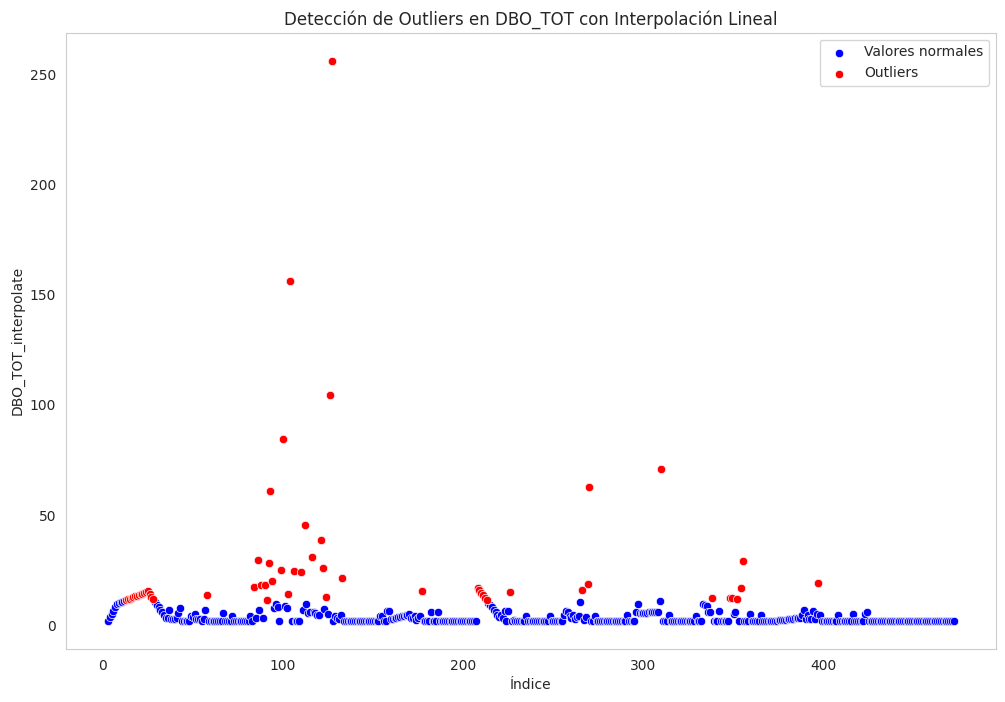

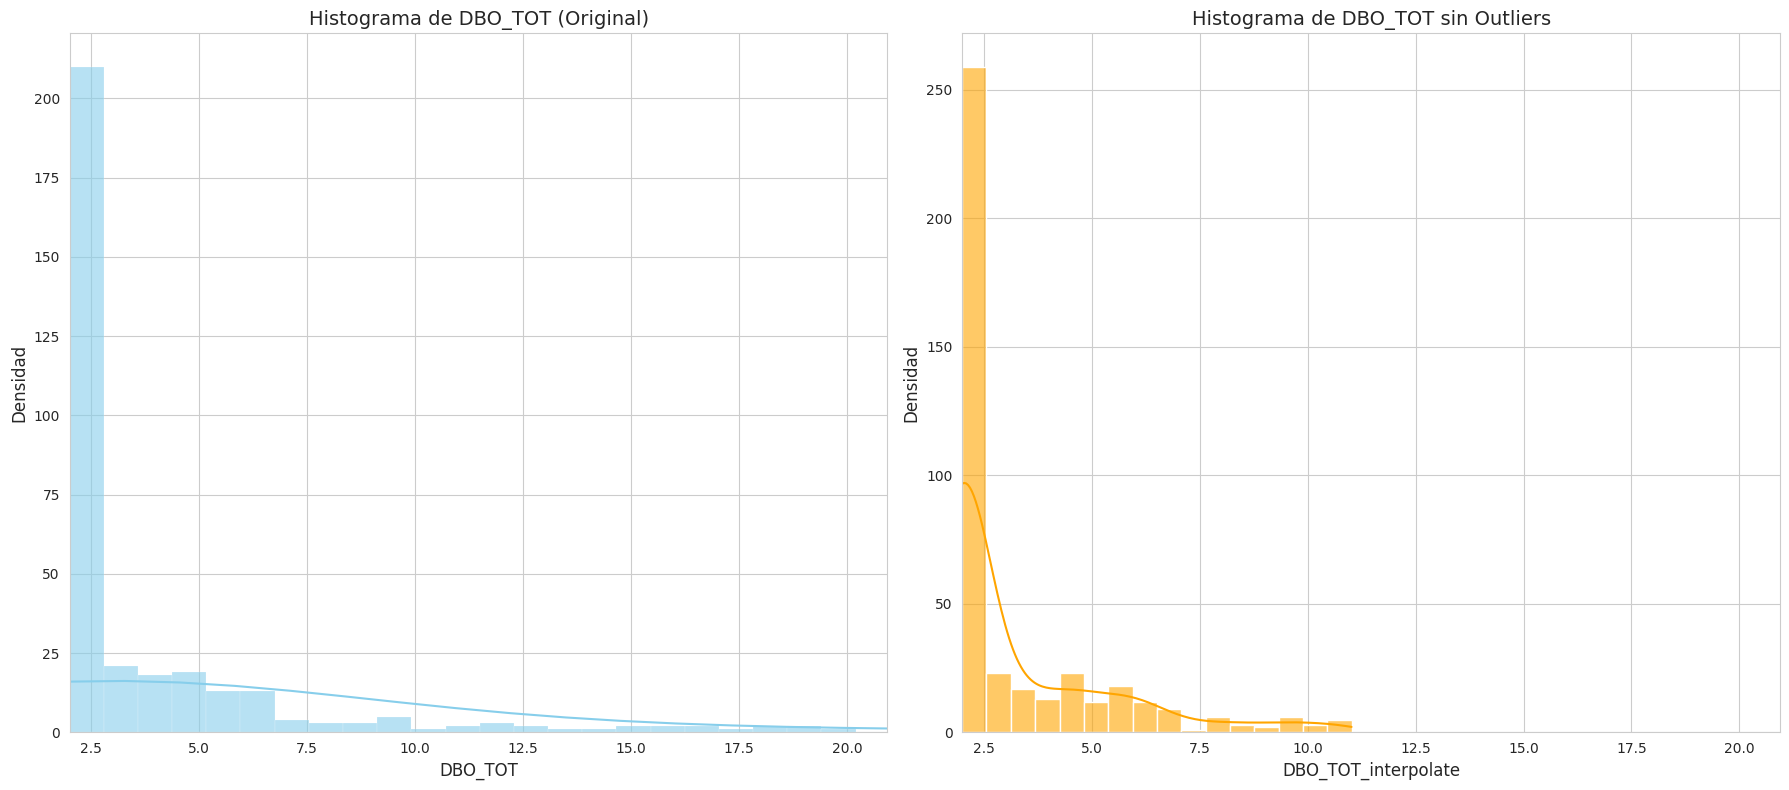

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo parquet
df = pd.read_parquet('/content/water_quality_tidy_data.parquet')

# Visualizar DBO_TOT original
plt.figure(figsize=(10, 6))
sns.histplot(df['DBO_TOT'], kde=True)
plt.title('Histograma de DBO_TOT (Original)')
plt.xlabel('DBO_TOT')
plt.grid()
plt.show()

# Verificar valores faltantes
missing_values = df['DBO_TOT'].isnull().sum()
print(f'Valores faltantes en DBO_TOT: {missing_values}')

# Imputar los valores faltantes usando interpolación lineal
df_interpolate = df.copy()
df_interpolate['DBO_TOT_interpolate'] = df_interpolate['DBO_TOT'].interpolate(method='linear')

# Visualizar DBO_TOT con interpolación lineal
plt.figure(figsize=(12, 8))
sns.histplot(df_interpolate['DBO_TOT_interpolate'], kde=True)
plt.title('DBO_TOT con Interpolación Lineal')
plt.xlabel('DBO_TOT_interpolate')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# Función para detectar outliers usando IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detectar outliers
df_interpolate['outlier_interpolate'] = detect_outliers_iqr(df_interpolate['DBO_TOT_interpolate'])
print(f'Outliers (Interpolate): {df_interpolate["outlier_interpolate"].sum()}')

# Ver los outliers en la tabla
outliers_table = df_interpolate[df_interpolate['outlier_interpolate']]
print(outliers_table)

# Visualizar los outliers en la gráfica
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_interpolate.index, y=df_interpolate['DBO_TOT_interpolate'], color='blue', label='Valores normales')
sns.scatterplot(x=outliers_table.index, y=outliers_table['DBO_TOT_interpolate'], color='red', label='Outliers')
plt.title('Detección de Outliers en DBO_TOT con Interpolación Lineal')
plt.xlabel('Índice')
plt.ylabel('DBO_TOT_interpolate')
plt.grid()
plt.legend()
plt.show()

# Crear subplots para comparar las distribuciones
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Rango común para los ejes x
x_min = min(df['DBO_TOT'].min(), df_interpolate['DBO_TOT_interpolate'].min())
x_max = max(df['DBO_TOT'].max(), df_interpolate['DBO_TOT_interpolate'].max())

# Zoom a un rango específico de valores para una mejor visualización
zoom_min, zoom_max = df['DBO_TOT'].quantile(0.05), df['DBO_TOT'].quantile(0.95)

# Histograma original con zoom
sns.histplot(data=df, x='DBO_TOT', ax=axes[0], kde=True, color='skyblue', alpha=0.6)
axes[0].set_title('Histograma de DBO_TOT (Original)', fontsize=14)
axes[0].set_xlabel('DBO_TOT', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)
axes[0].tick_params(labelsize=10)
axes[0].set_xlim(zoom_min, zoom_max)

# Histograma sin outliers con zoom
sns.histplot(data=df_interpolate[~df_interpolate['outlier_interpolate']], x='DBO_TOT_interpolate', ax=axes[1], kde=True, color='orange', alpha=0.6)
axes[1].set_title('Histograma de DBO_TOT sin Outliers', fontsize=14)
axes[1].set_xlabel('DBO_TOT_interpolate', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)
axes[1].tick_params(labelsize=10)
axes[1].set_xlim(zoom_min, zoom_max)

plt.tight_layout()
plt.show()
